### Predicting sentiment of movie review from IMDB

In [2]:
# importing required base packkages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing imdb dataset
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

Using TensorFlow backend.


In [4]:
# total words in training dataset
total_words = len(np.unique(np.hstack(x_train)))
total_words

88585

In [5]:
# checking for word length of each review in training set
review_length = [len(x) for x in x_train]

In [6]:
# count of negative and positive review in training set
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 12500, 1: 12500}

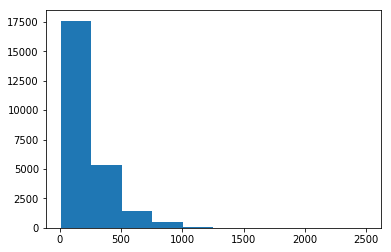

In [7]:
# plotting review length
plt.hist(review_length)
plt.show()

#### since most of the reviews has length of  approx. 500, i choose maxlen of 500

In [112]:
# importing required Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [126]:
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [113]:
top_words = np.hstack(x_train).max() + 1
print(top_words)

88587


#### Simple convolution model

In [114]:
# model 1
imdb_model1 = Sequential()
imdb_model1.add(Embedding(top_words, 32, input_length=max_words))
imdb_model1.add(Flatten())
imdb_model1.add(Dense(250, activation='relu'))
imdb_model1.add(Dense(1, activation='sigmoid'))
imdb_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
# fitting model on training dataset
imdb_model1.fit(x_train, y_train, epochs=3, batch_size=50)

Epoch 1/3
25000/25000 [==============================] - 170s 7ms/step - loss: 0.4116 - acc: 0.7910
Epoch 2/3
25000/25000 [==============================] - 174s 7ms/step - loss: 0.0794 - acc: 0.9722
Epoch 3/3
25000/25000 [==============================] - 176s 7ms/step - loss: 0.0065 - acc: 0.9989


In [116]:
# checking for accuracy of model 1
accuracy = imdb_model1.evaluate(x_test, y_test)
print(accuracy)

25000/25000 [==============================] - 17s 700us/step
[0.49909533260822297, 0.86075999999999997]


#### with simple convolution network we able to achieve accuracy of approx 86%

In [117]:
predict = imdb_model1.predict(x_test)

In [118]:
predict = (predict > 0.5)

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
print(cm)

[[10950  1550]
 [ 1931 10569]]


#### RNN model

In [120]:
# model 2
imdb_model2 = Sequential()
imdb_model2.add(Embedding(top_words, 32, input_length=max_words))
imdb_model2.add(LSTM(100))
imdb_model2.add(Dense(1, activation='sigmoid'))
imdb_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
# fitting data on model 2
imdb_model2.fit(x_train, y_train, epochs=3, batch_size=50)

Epoch 1/3
25000/25000 [==============================] - 826s 33ms/step - loss: 0.5227 - acc: 0.7463
Epoch 2/3
25000/25000 [==============================] - 798s 32ms/step - loss: 0.2718 - acc: 0.8944
Epoch 3/3
25000/25000 [==============================] - 854s 34ms/step - loss: 0.1487 - acc: 0.9490


In [124]:
# checking for accuracy on test data for model 2
accuracy = imdb_model2.evaluate(x_test, y_test)
print(accuracy)

25000/25000 [==============================] - 208s 8ms/step
[0.36588384373188021, 0.85624]


#### we receive same accuracy of 86% with first RNN model.

#### RNN model with dropout

In [127]:
# model 3
imdb_model3 = Sequential()
imdb_model3.add(Embedding(top_words, 32, input_length=max_words))
imdb_model3.add(Dropout(0.2))
imdb_model3.add(LSTM(100))
imdb_model3.add(Dropout(0.2))
imdb_model3.add(Dense(1, activation='sigmoid'))
imdb_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
# fitting model on training data
imdb_model3.fit(x_train, y_train, epochs=3, batch_size=50)

Epoch 1/3
25000/25000 [==============================] - 1015s 41ms/step - loss: 0.4566 - acc: 0.7784
Epoch 2/3
25000/25000 [==============================] - 887s 35ms/step - loss: 0.2425 - acc: 0.9078
Epoch 3/3
25000/25000 [==============================] - 762s 30ms/step - loss: 0.1746 - acc: 0.9395


In [129]:
# checking for accuracy of model 3
accuracy = imdb_model3.evaluate(x_test, y_test)
print(accuracy)

25000/25000 [==============================] - 169s 7ms/step
[0.37986675054311753, 0.86351999999999995]


#### Accuracy = 86%

#### RNN with dropout with only top 5000 words

In [92]:
top_words = 5000

In [93]:
# loading dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=top_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [94]:
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [95]:
# model 4
imdb_model4 = Sequential()
imdb_model4.add(Embedding(top_words, 32, input_length=max_words))
imdb_model4.add(Dropout(0.2))
imdb_model4.add(LSTM(100))
imdb_model4.add(Dropout(0.2))
imdb_model4.add(Dense(1, activation='sigmoid'))
imdb_model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
# fitting model on training data
imdb_model4.fit(x_train, y_train, epochs=3, batch_size=50)

Epoch 1/3
25000/25000 [==============================] - 702s 28ms/step - loss: 0.4872 - acc: 0.7535
Epoch 2/3
25000/25000 [==============================] - 750s 30ms/step - loss: 0.3623 - acc: 0.8514
Epoch 3/3
25000/25000 [==============================] - 779s 31ms/step - loss: 0.2758 - acc: 0.8924


In [97]:
#checking for accuracy of model 4
accuracy = imdb_model4.evaluate(x_test, y_test)
print(accuracy)

25000/25000 [==============================] - 211s 8ms/step
[0.31045332148551941, 0.86968000000000001]


#### marginally able to increase accuracy to 87% by using top 5000 words